In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv("Smarket.csv")

## Data Exploration and Analysis

In [3]:
# see the first 5 data in the dataset
data.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
data.shape
# so the data construct from 1250 observable data or rows 
# and 10 features columns

(1250, 10)

In [5]:
# see the data type each column(features)
data.info()
# we can see that the column or feature number 9 has 
# data type as object or string but the problem is 
# in machine learning generaly the algorithm doesn't 
# work with non numerical value so we need to convert 
# the string into integer 0 for down and 1 for up
# we can say this method as one hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1250 non-null   int64  
 1   Year        1250 non-null   int64  
 2   Lag1        1250 non-null   float64
 3   Lag2        1250 non-null   float64
 4   Lag3        1250 non-null   float64
 5   Lag4        1250 non-null   float64
 6   Lag5        1250 non-null   float64
 7   Volume      1250 non-null   float64
 8   Today       1250 non-null   float64
 9   Direction   1250 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 97.8+ KB


In [6]:
# see the statistical data each columns(features)
data.describe()
# we can also see that the Direction can't be desribe 
# because it's not a numerical data

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [7]:
# see if there any Null or NA value in our dataset
print(data.isnull().sum())
# from the result we can see there is no Null or NA value in the dataset 

Unnamed: 0    0
Year          0
Lag1          0
Lag2          0
Lag3          0
Lag4          0
Lag5          0
Volume        0
Today         0
Direction     0
dtype: int64


In [8]:
def change_obj2int(df):
    """
    df : is the feature or column from the y target 
    this helper help change the data type
    from object(string) into integer
    0 for Down
    1 for Up
    """
    list = []
    for data in df:
        if data == 'Up':
            list.append(1)
        else:
            list.append(0)
    return list
# so basicly the helper will return the data into
# list data structure so we need to convert and 
# add the new column to our dataset

In [9]:
data_list = change_obj2int(data.Direction)

In [10]:
#print(data_list)
# for checking the result

In [11]:
# add our new list into the data frame
data['Outcome'] = data_list

In [12]:
data.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Outcome
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [13]:
data.tail()
# we can see that our method perform well

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Outcome
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up,1
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down,0
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up,1
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down,0
1249,1250,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down,0


## Data Visualization

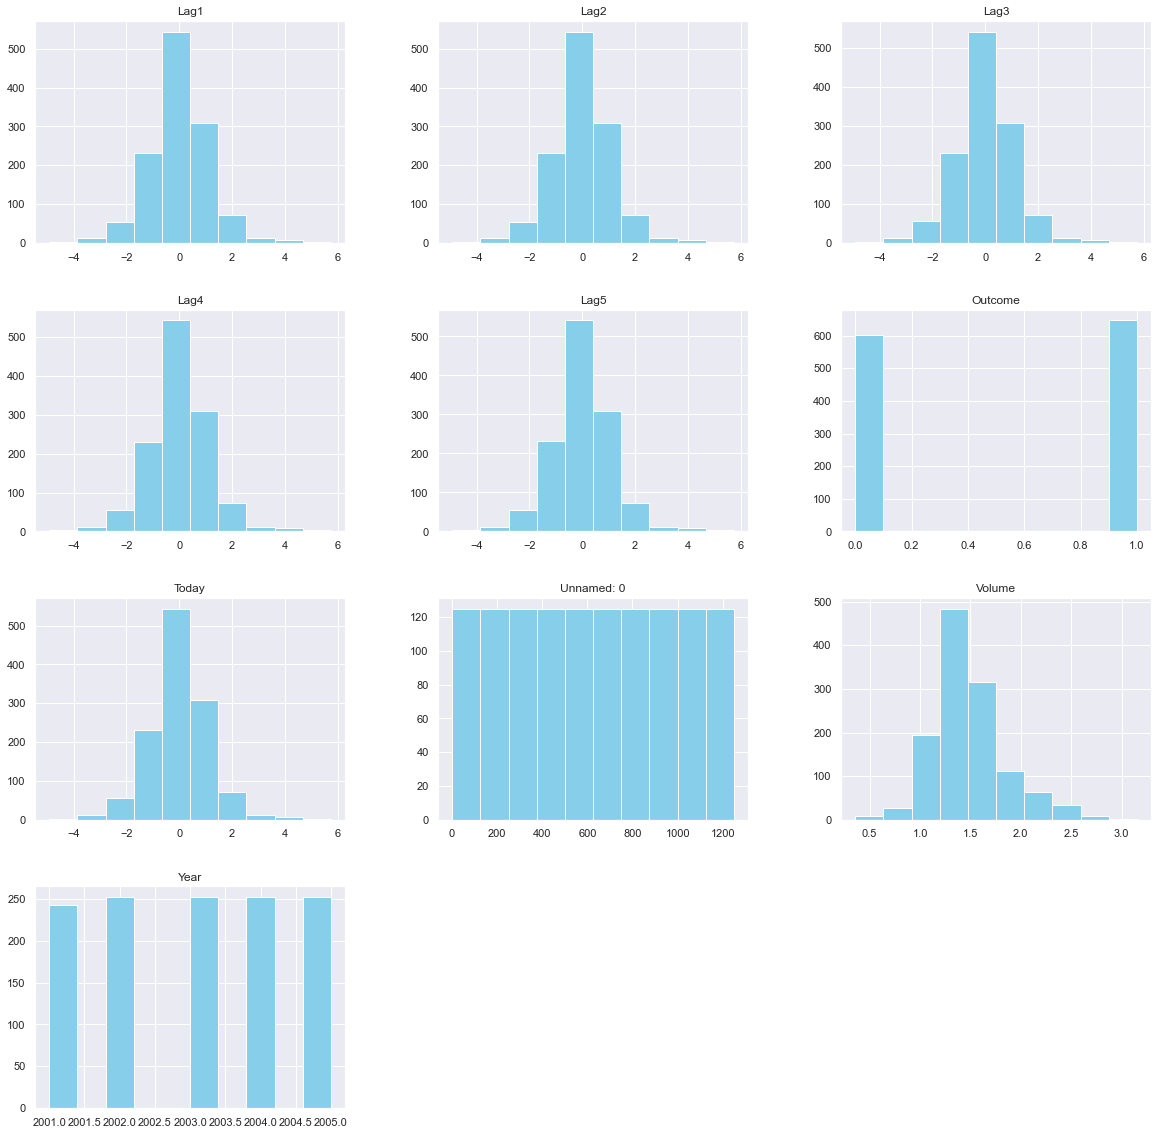

In [14]:
vis = data.hist(figsize=(20,20), color="skyblue")
# maybe we can ignore some of features like Unnamed 0 because the data
# is only number of the datas, Outcome because it's spose only have 
# two data variation also year

In [15]:
#new_data = data.drop('Year', axis= 1) # if the object only one
new_data = data.drop(columns=['Year', 'Direction', 'Unnamed: 0'], axis= 1)

In [16]:
new_data.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Outcome
0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


## Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [18]:
X = pd.DataFrame(scale.fit_transform(new_data.drop("Outcome", axis=1),),
                 columns=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 
                          'Volume', 'Today'])

In [19]:
X.head()
# we can see the data has same or similar scale
# because we apply the stadardscaler 

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,0.332058,-0.172491,-2.306806,-0.928243,4.362679,-0.796765,0.841517
1,0.840930,0.331988,-0.170188,-2.306592,-0.924608,-0.504715,0.905784
2,0.905199,0.840869,0.333218,-0.170107,-2.292416,-0.186293,-0.551237
3,-0.551867,0.905140,0.841016,0.333267,-0.172270,-0.561626,0.537787
4,0.537191,-0.551950,0.905149,0.841034,0.327254,-0.756789,0.184757


In [20]:
y = new_data.Outcome

In [21]:
#y.head()
# only for checking

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state= 42, 
                                                    stratify=y)

In [23]:
print('X_training : ',len(X_train))
print('y_training : ',len(y_train))
# size of the training

X_training :  875
y_training :  875


In [24]:
print('X_testing : ',len(X_test))
print('y_testing : ',len(y_test))
# size of the test

X_testing :  375
y_testing :  375


In [25]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

## Model Validation

In [26]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [27]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 89.86666666666666 % and k = [7]


In [28]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)

print('Train Accuracy at k=7 : ',knn.score(X_train, y_train))
print('Test Accuracy at k=7  : ',knn.score(X_test, y_test))

Train Accuracy at k=7 :  0.928
Test Accuracy at k=7  :  0.8986666666666666


### Result Visualisation

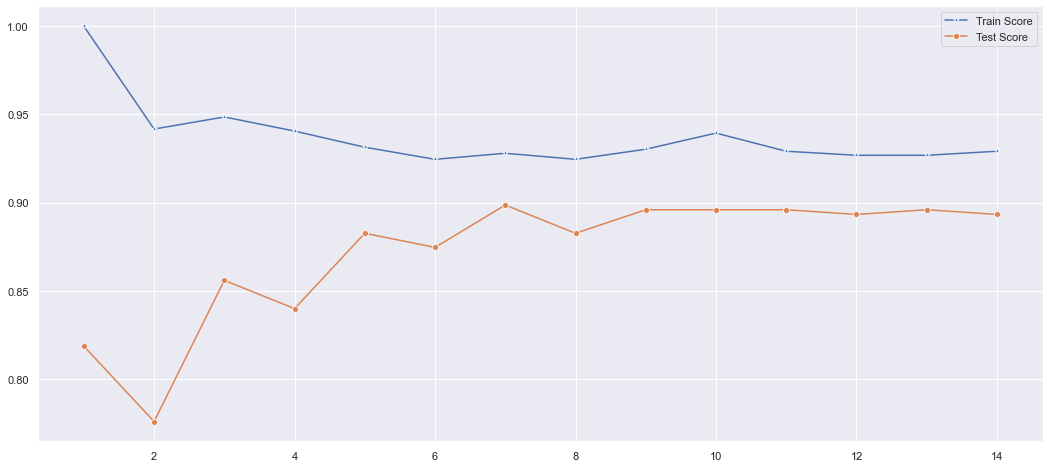

In [29]:
plt.figure(figsize=(18,8))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')
# from 15 iteration we can see that at k=7 is the peak of the accuracy of test

In [30]:
average_test = sum(test_scores) / len(test_scores)
average_test

0.8714285714285713

In [31]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(7)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8986666666666666

### Confusion Matrix

In [32]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above

y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,159,22,181
1,16,178,194
All,175,200,375


Text(0.5, 12.5, 'Predicted label')

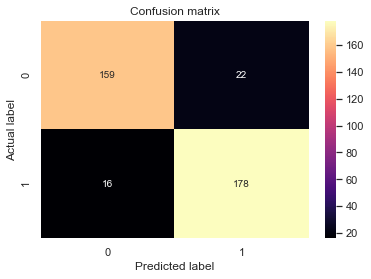

In [33]:
y_pred = knn.predict(X_test) # to predict we must use X_test or maybe our prefer data set

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # make confusion matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="magma" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC

In [34]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

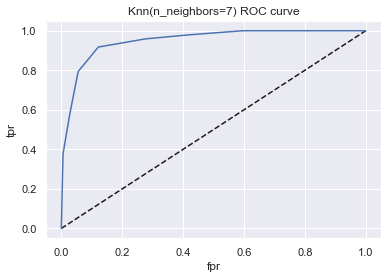

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

## Hyper Parameter Optimization
### GridSearch

In [36]:
# applying the grid search method
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))
# for 46 neighbor is that not having some overfitting problem ???

Best Score:0.908
Best Parameters: {'n_neighbors': 46}


#### Experiment Prediction
we can make our self value for each feature and test to our model is it will predict our new value with goods?

In [37]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
Lag1 = 0.28
Lag2 = -0.60
Lag3 = -2.90
Lag4 = 2.00
Lag5 = 5.79
Volume = 1.59
Today = 2.75

new_val = np.array([[Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today]])
print(f'new_val shape : {new_val.shape}')

new_val shape : (1, 7)


In [39]:
prediction = knn.predict(new_val)

In [40]:
prediction

array([1], dtype=int64)

In [41]:
if prediction == 1:
    print('Up')
else:
    print('Down')

Up
